<a href="https://colab.research.google.com/github/Samahit2000/Deep-Learning/blob/main/irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

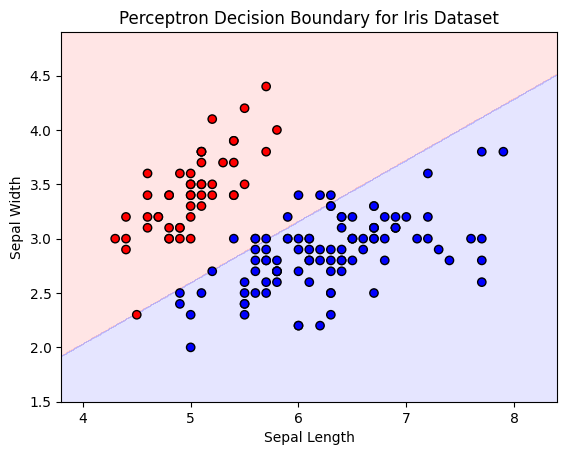

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

class PerceptronModel:
    def init(self, learning_rate=0.1, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(X.shape[0]):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if z >= 0 else 0
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        return np.array([1 if np.dot(x, self.weights) + self.bias >= 0 else 0 for x in X])

def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take sepal length and width
y = (iris.target != 0).astype(int)  # Binary classification (setosa vs non-setosa)

# Train Perceptron on Iris dataset
from sklearn.linear_model import Perceptron
perceptron_iris = Perceptron(eta0=0.1, max_iter=100)

perceptron_iris.fit(X, y)

# Plot decision boundary for Iris dataset
plot_decision_boundary(X, y, perceptron_iris, "Perceptron Decision Boundary for Iris Dataset")